## Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # statistic analysis
import matplotlib.pyplot as plt # data visualization
%matplotlib inline
import os
from sklearn import preprocessing

## Read in csv dataset

In [2]:
# CSV file path for energy data and global land tempurature data
energy_temp_path = "data/energy_temp_1965_2020.csv"

# Read csv files from the path
energy_temp_read_csv = pd.read_csv(energy_temp_path) 

# Make copy file so the original data won't be altered
df = energy_temp_read_csv.copy()

## Exploratory Data Analysis

In [3]:
# Exploratory Data Analysis (EDA) 
print(df.info())
print(df.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6629 entries, 0 to 6628
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   6629 non-null   object 
 1   Year                      6629 non-null   int64  
 2   pop                       6603 non-null   float64
 3   Region                    5763 non-null   object 
 4   co2_mtco2                 5023 non-null   float64
 5   elect_twh                 3369 non-null   float64
 6   primary_ej                5023 non-null   float64
 7   annual_anomaly            560 non-null    float64
 8   annual_temp               560 non-null    float64
 9   Monthly consumption, TWh  10 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 518.0+ KB
None
        Country         Year          pop  Region     co2_mtco2     elect_twh  \
count      6629  6629.000000  6603.000000    5763   5023.000000   3369.000000   
un

## Global trend for normalized variables

In [4]:
# Normalize the global trend to be displayed in one graph
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

scaled_pop = NormalizeData(df[df.Country == "Total World"]["pop"])
scaled_co2_mtco2 = NormalizeData(df[df.Country == "Total World"]["co2_mtco2"])
scaled_elect_twh = NormalizeData(df[df.Country == "Total World"]["elect_twh"])
scaled_primary_ej = NormalizeData(df[df.Country == "Total World"]["primary_ej"])
scaled_annual_temp = NormalizeData(df[df.Country == "Total World"]["annual_temp"])
scaled_monthly_consumption = NormalizeData(df[df.Country == "Total World"]["Monthly consumption, TWh"])

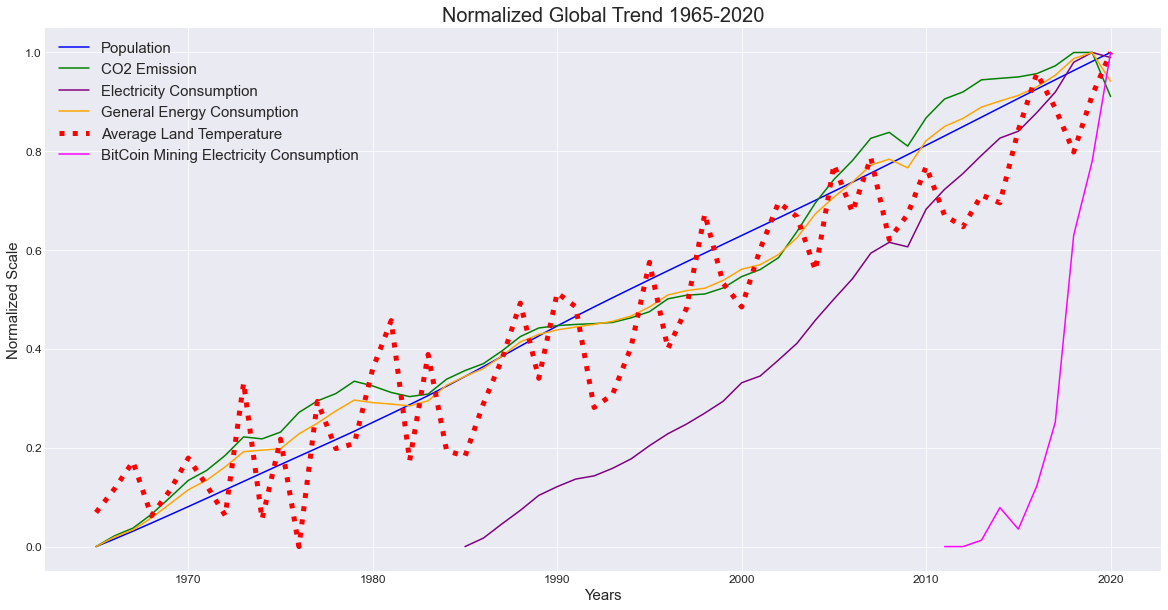

In [5]:
# ticks font size
plt.rc('font', size="15")          # controls default text sizes
plt.rc('axes', titlesize="20")     # fontsize of the axes title
plt.rc('axes', labelsize="15")    # fontsize of the x and y labels
plt.rc('xtick', labelsize="12")    # fontsize of the tick labels
plt.rc('ytick', labelsize="12")    # fontsize of the tick labels
plt.rc('legend', fontsize="15")    # legend fontsize
plt.rc('figure', titlesize="15")  # fontsize of the figure title
#
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20,10))

# Plot global trend vs population, CO2 emmission, energy consumption, electricity consumption, annual temperature, and Bitcoin mining electricity consumption
plt.plot(df[df.Country == "Total World"]["Year"],scaled_pop, label = "Population", c = "blue")
plt.plot(df[df.Country == "Total World"]["Year"],scaled_co2_mtco2, label = "CO2 Emission", c = "green")
plt.plot(df[df.Country == "Total World"]["Year"],scaled_elect_twh, label = "Electricity Consumption", c = "purple")
plt.plot(df[df.Country == "Total World"]["Year"],scaled_primary_ej, label = "General Energy Consumption", c = "orange")
plt.plot(df[df.Country == "Total World"]["Year"],scaled_annual_temp, label = "Average Land Temperature", ls = ":", linewidth = "5", c = "red")
plt.plot(df[df.Country == "Total World"]["Year"],scaled_monthly_consumption, label = "BitCoin Mining Electricity Consumption", c = "magenta")
plt.legend()

#title
plt.title('Normalized Global Trend 1965-2020')
ax=plt.gca()
ax.title.set_position([.5, 1.1])

#labels
plt.xlabel('Years')
plt.ylabel("Normalized Scale")
plt.savefig('Normalized_Global_Trend_1965-2020.png')
plt.show()

## Global trend for raw variables

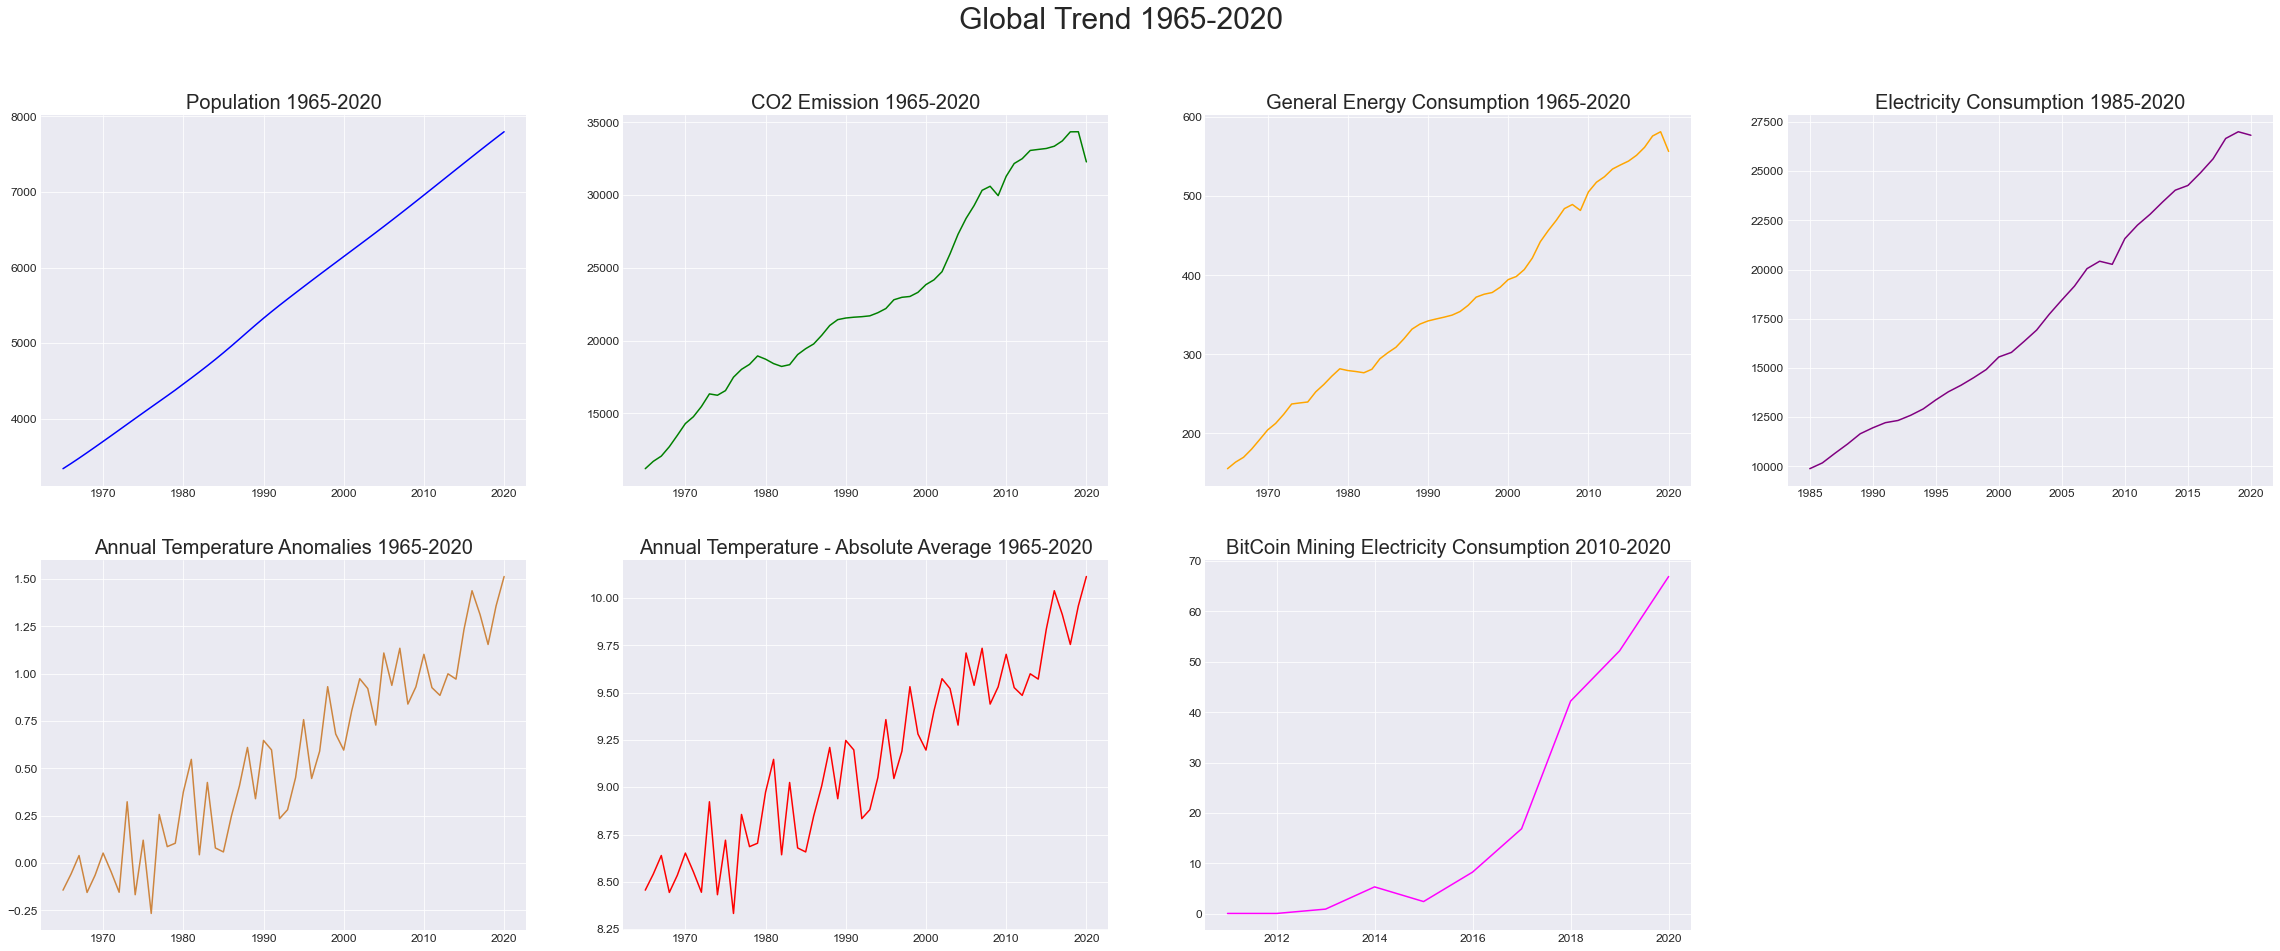

In [6]:
# ticks font size
plt.rc('font', size="15")          # controls default text sizes
plt.rc('axes', titlesize="20")     # fontsize of the axes title
plt.rc('axes', labelsize="15")    # fontsize of the x and y labels
plt.rc('xtick', labelsize="12")    # fontsize of the tick labels
plt.rc('ytick', labelsize="12")    # fontsize of the tick labels
plt.rc('legend', fontsize="15")    # legend fontsize
plt.rc('figure', titlesize="15")  # fontsize of the figure title
#
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(40,15))

plt.subplot(2, 4, 1)
plt.plot(df[df.Country == "Total World"]["Year"], df[df.Country == "Total World"]["pop"], c = "blue")
plt.title("Population 1965-2020")

plt.subplot(2, 4, 2)
plt.plot(df[df.Country == "Total World"]["Year"], df[df.Country == "Total World"]["co2_mtco2"], c = "green")
plt.title("CO2 Emission 1965-2020")

plt.subplot(2, 4, 3)
plt.plot(df[df.Country == "Total World"]["Year"], df[df.Country == "Total World"]["primary_ej"], c = "orange")
plt.title("General Energy Consumption 1965-2020")

plt.subplot(2, 4, 4)
plt.plot(df[df.Country == "Total World"]["Year"], df[df.Country == "Total World"]["elect_twh"], c = "purple")
plt.title("Electricity Consumption 1985-2020")

plt.subplot(2, 4, 5)
plt.plot(df[df.Country == "Total World"]["Year"], df[df.Country == "Total World"]["annual_anomaly"], c = "peru")
plt.title("Annual Temperature Anomalies 1965-2020")

plt.subplot(2, 4, 6)
plt.plot(df[df.Country == "Total World"]["Year"], df[df.Country == "Total World"]["annual_temp"], c = "red")
plt.title("Annual Temperature - Absolute Average 1965-2020")

plt.subplot(2, 4, 7)
plt.plot(df[df.Country == "Total World"]["Year"], df[df.Country == "Total World"]["Monthly consumption, TWh"], c = "magenta")
plt.title("BitCoin Mining Electricity Consumption 2010-2020")


plt.suptitle("Global Trend 1965-2020", fontsize="30")
plt.savefig('Global_Trend_1965-2020.png')
plt.show()

## Population trend by country

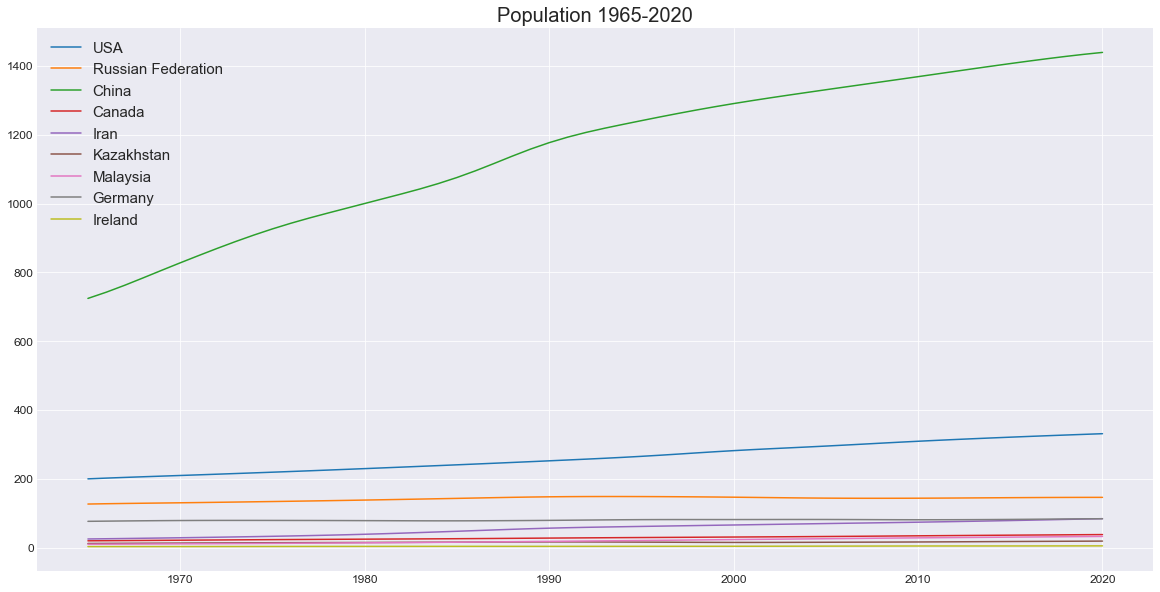

In [7]:
# ticks font size
plt.rc('font', size="15")          # controls default text sizes
plt.rc('axes', titlesize="20")     # fontsize of the axes title
plt.rc('axes', labelsize="15")    # fontsize of the x and y labels
plt.rc('xtick', labelsize="12")    # fontsize of the tick labels
plt.rc('ytick', labelsize="12")    # fontsize of the tick labels
plt.rc('legend', fontsize="15")    # legend fontsize
plt.rc('figure', titlesize="15")  # fontsize of the figure title
#
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20,10))

plt.plot(df[df.Country == "USA"]["Year"], df[df.Country == "USA"]["pop"], label = "USA")
plt.plot(df[df.Country == "Russian Federation"]["Year"], df[df.Country == "Russian Federation"]["pop"], label = "Russian Federation")
plt.plot(df[df.Country == "China"]["Year"], df[df.Country == "China"]["pop"], label = "China")
plt.plot(df[df.Country == "Canada"]["Year"], df[df.Country == "Canada"]["pop"], label = "Canada")
plt.plot(df[df.Country == "Iran"]["Year"], df[df.Country == "Iran"]["pop"], label = "Iran")
plt.plot(df[df.Country == "Kazakhstan"]["Year"], df[df.Country == "Kazakhstan"]["pop"], label = "Kazakhstan")
plt.plot(df[df.Country == "Malaysia"]["Year"], df[df.Country == "Malaysia"]["pop"], label = "Malaysia")
plt.plot(df[df.Country == "Germany"]["Year"], df[df.Country == "Germany"]["pop"], label = "Germany")
plt.plot(df[df.Country == "Ireland"]["Year"], df[df.Country == "Ireland"]["pop"], label = "Ireland")

plt.title("Population 1965-2020")
plt.legend()
plt.savefig('Population_Trend_1965-2020.png')
plt.show()

## CO2 emission trend by country

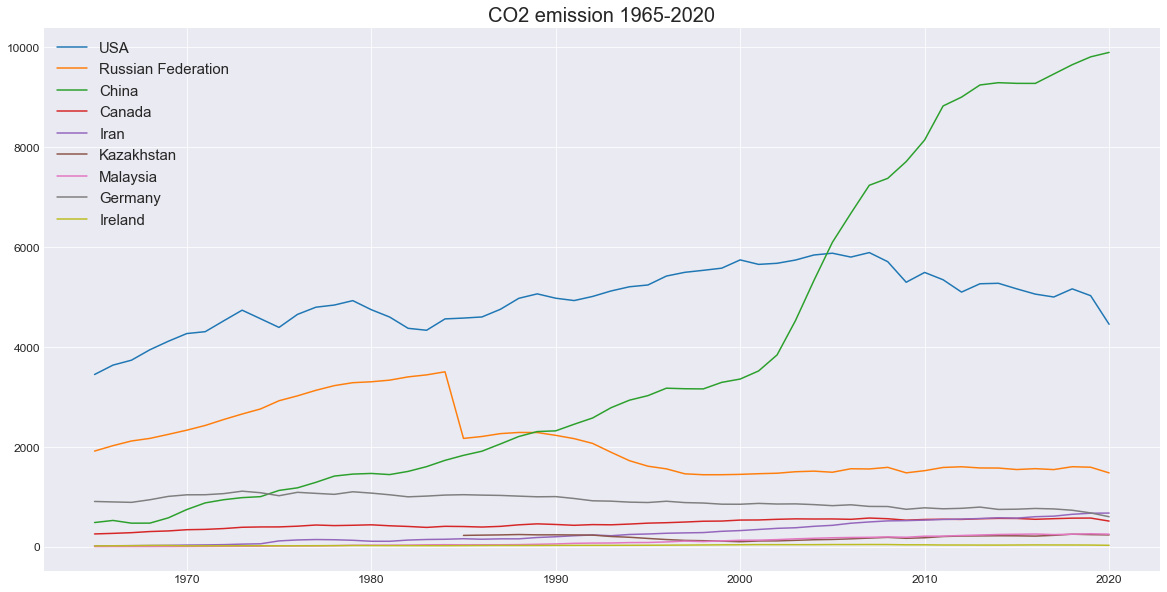

In [8]:
# ticks font size
plt.rc('font', size="15")          # controls default text sizes
plt.rc('axes', titlesize="20")     # fontsize of the axes title
plt.rc('axes', labelsize="15")    # fontsize of the x and y labels
plt.rc('xtick', labelsize="12")    # fontsize of the tick labels
plt.rc('ytick', labelsize="12")    # fontsize of the tick labels
plt.rc('legend', fontsize="15")    # legend fontsize
plt.rc('figure', titlesize="15")  # fontsize of the figure title
#
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20,10))

plt.plot(df[df.Country == "USA"]["Year"], df[df.Country == "USA"]["co2_mtco2"], label = "USA")
plt.plot(df[df.Country == "Russian Federation"]["Year"], df[df.Country == "Russian Federation"]["co2_mtco2"], label = "Russian Federation")
plt.plot(df[df.Country == "China"]["Year"], df[df.Country == "China"]["co2_mtco2"], label = "China")
plt.plot(df[df.Country == "Canada"]["Year"], df[df.Country == "Canada"]["co2_mtco2"], label = "Canada")
plt.plot(df[df.Country == "Iran"]["Year"], df[df.Country == "Iran"]["co2_mtco2"], label = "Iran")
plt.plot(df[df.Country == "Kazakhstan"]["Year"], df[df.Country == "Kazakhstan"]["co2_mtco2"], label = "Kazakhstan")
plt.plot(df[df.Country == "Malaysia"]["Year"], df[df.Country == "Malaysia"]["co2_mtco2"], label = "Malaysia")
plt.plot(df[df.Country == "Germany"]["Year"], df[df.Country == "Germany"]["co2_mtco2"], label = "Germany")
plt.plot(df[df.Country == "Ireland"]["Year"], df[df.Country == "Ireland"]["co2_mtco2"], label = "Ireland")

plt.title("CO2 emission 1965-2020")
plt.legend()
plt.savefig('CO2_Emission_Trend_1965-2020.png')
plt.show()

## General energy consumption trend by country

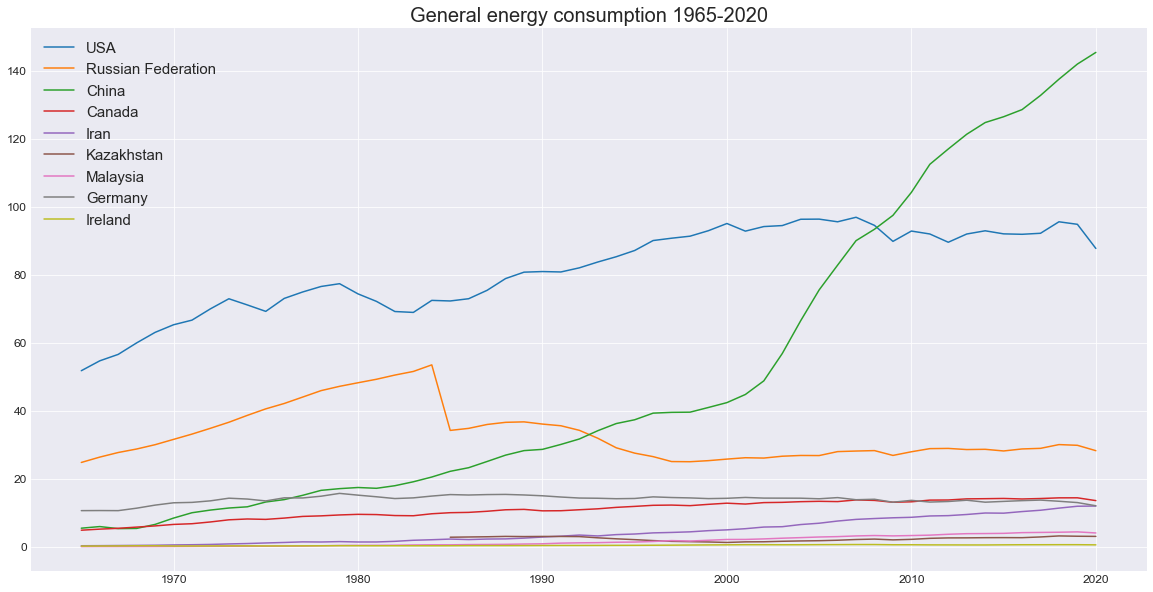

In [9]:
# ticks font size
plt.rc('font', size="15")          # controls default text sizes
plt.rc('axes', titlesize="20")     # fontsize of the axes title
plt.rc('axes', labelsize="15")    # fontsize of the x and y labels
plt.rc('xtick', labelsize="12")    # fontsize of the tick labels
plt.rc('ytick', labelsize="12")    # fontsize of the tick labels
plt.rc('legend', fontsize="15")    # legend fontsize
plt.rc('figure', titlesize="15")  # fontsize of the figure title
#
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20,10))

plt.plot(df[df.Country == "USA"]["Year"], df[df.Country == "USA"]["primary_ej"], label = "USA")
plt.plot(df[df.Country == "Russian Federation"]["Year"], df[df.Country == "Russian Federation"]["primary_ej"], label = "Russian Federation")
plt.plot(df[df.Country == "China"]["Year"], df[df.Country == "China"]["primary_ej"], label = "China")
plt.plot(df[df.Country == "Canada"]["Year"], df[df.Country == "Canada"]["primary_ej"], label = "Canada")
plt.plot(df[df.Country == "Iran"]["Year"], df[df.Country == "Iran"]["primary_ej"], label = "Iran")
plt.plot(df[df.Country == "Kazakhstan"]["Year"], df[df.Country == "Kazakhstan"]["primary_ej"], label = "Kazakhstan")
plt.plot(df[df.Country == "Malaysia"]["Year"], df[df.Country == "Malaysia"]["primary_ej"], label = "Malaysia")
plt.plot(df[df.Country == "Germany"]["Year"], df[df.Country == "Germany"]["primary_ej"], label = "Germany")
plt.plot(df[df.Country == "Ireland"]["Year"], df[df.Country == "Ireland"]["primary_ej"], label = "Ireland")

plt.title("General energy consumption 1965-2020")
plt.legend()
plt.savefig('General_Energy_Consumption_Trend_1965-2020.png')
plt.show()

## Electricity consumption trend by country

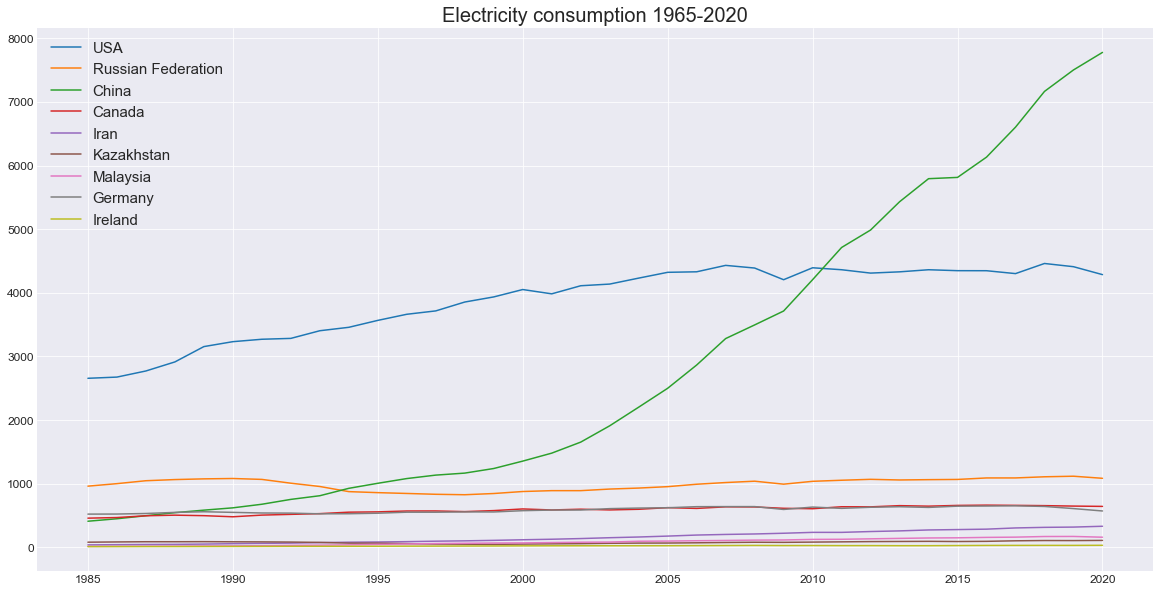

In [10]:
# ticks font size
plt.rc('font', size="15")          # controls default text sizes
plt.rc('axes', titlesize="20")     # fontsize of the axes title
plt.rc('axes', labelsize="15")    # fontsize of the x and y labels
plt.rc('xtick', labelsize="12")    # fontsize of the tick labels
plt.rc('ytick', labelsize="12")    # fontsize of the tick labels
plt.rc('legend', fontsize="15")    # legend fontsize
plt.rc('figure', titlesize="15")  # fontsize of the figure title
#
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20,10))

plt.plot(df[df.Country == "USA"]["Year"], df[df.Country == "USA"]["elect_twh"], label = "USA")
plt.plot(df[df.Country == "Russian Federation"]["Year"], df[df.Country == "Russian Federation"]["elect_twh"], label = "Russian Federation")
plt.plot(df[df.Country == "China"]["Year"], df[df.Country == "China"]["elect_twh"], label = "China")
plt.plot(df[df.Country == "Canada"]["Year"], df[df.Country == "Canada"]["elect_twh"], label = "Canada")
plt.plot(df[df.Country == "Iran"]["Year"], df[df.Country == "Iran"]["elect_twh"], label = "Iran")
plt.plot(df[df.Country == "Kazakhstan"]["Year"], df[df.Country == "Kazakhstan"]["elect_twh"], label = "Kazakhstan")
plt.plot(df[df.Country == "Malaysia"]["Year"], df[df.Country == "Malaysia"]["elect_twh"], label = "Malaysia")
plt.plot(df[df.Country == "Germany"]["Year"], df[df.Country == "Germany"]["elect_twh"], label = "Germany")
plt.plot(df[df.Country == "Ireland"]["Year"], df[df.Country == "Ireland"]["elect_twh"], label = "Ireland")

plt.title("Electricity consumption 1965-2020")
plt.legend()
plt.savefig('Electricity_Consumption_Trend_1965-2020.png')
plt.show()

## Annual temperature anomaly by country

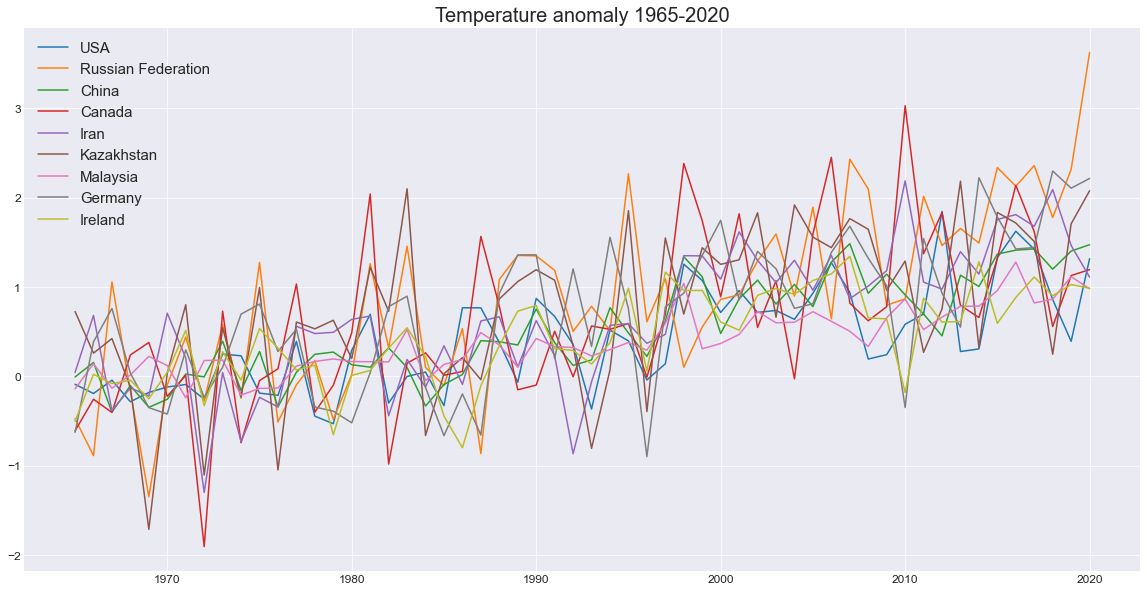

In [11]:
# ticks font size
plt.rc('font', size="15")          # controls default text sizes
plt.rc('axes', titlesize="20")     # fontsize of the axes title
plt.rc('axes', labelsize="15")    # fontsize of the x and y labels
plt.rc('xtick', labelsize="12")    # fontsize of the tick labels
plt.rc('ytick', labelsize="12")    # fontsize of the tick labels
plt.rc('legend', fontsize="15")    # legend fontsize
plt.rc('figure', titlesize="15")  # fontsize of the figure title
#
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20,10))

plt.plot(df[df.Country == "USA"]["Year"], df[df.Country == "USA"]["annual_anomaly"], label = "USA")
plt.plot(df[df.Country == "Russian Federation"]["Year"], df[df.Country == "Russian Federation"]["annual_anomaly"], label = "Russian Federation")
plt.plot(df[df.Country == "China"]["Year"], df[df.Country == "China"]["annual_anomaly"], label = "China")
plt.plot(df[df.Country == "Canada"]["Year"], df[df.Country == "Canada"]["annual_anomaly"], label = "Canada")
plt.plot(df[df.Country == "Iran"]["Year"], df[df.Country == "Iran"]["annual_anomaly"], label = "Iran")
plt.plot(df[df.Country == "Kazakhstan"]["Year"], df[df.Country == "Kazakhstan"]["annual_anomaly"], label = "Kazakhstan")
plt.plot(df[df.Country == "Malaysia"]["Year"], df[df.Country == "Malaysia"]["annual_anomaly"], label = "Malaysia")
plt.plot(df[df.Country == "Germany"]["Year"], df[df.Country == "Germany"]["annual_anomaly"], label = "Germany")
plt.plot(df[df.Country == "Ireland"]["Year"], df[df.Country == "Ireland"]["annual_anomaly"], label = "Ireland")

plt.title("Temperature anomaly 1965-2020")
plt.legend()
plt.savefig('Annual_Temperature_Anomaly_Trend_1965-2020.png')
plt.show()

## Yearly Temperature Anomaly HeatMap

In [12]:
country_of_interest = df[(df.Country == "USA") | 
                         (df.Country == "Russian Federation") | 
                         (df.Country == "China") | 
                         (df.Country == "Canada") | 
                         (df.Country == "Iran") | 
                         (df.Country == "Kazakhstan") | 
                         (df.Country == "Malaysia") | 
                         (df.Country == "Germany") | 
                         (df.Country == "Ireland") |
                         (df.Country == "Total World")]

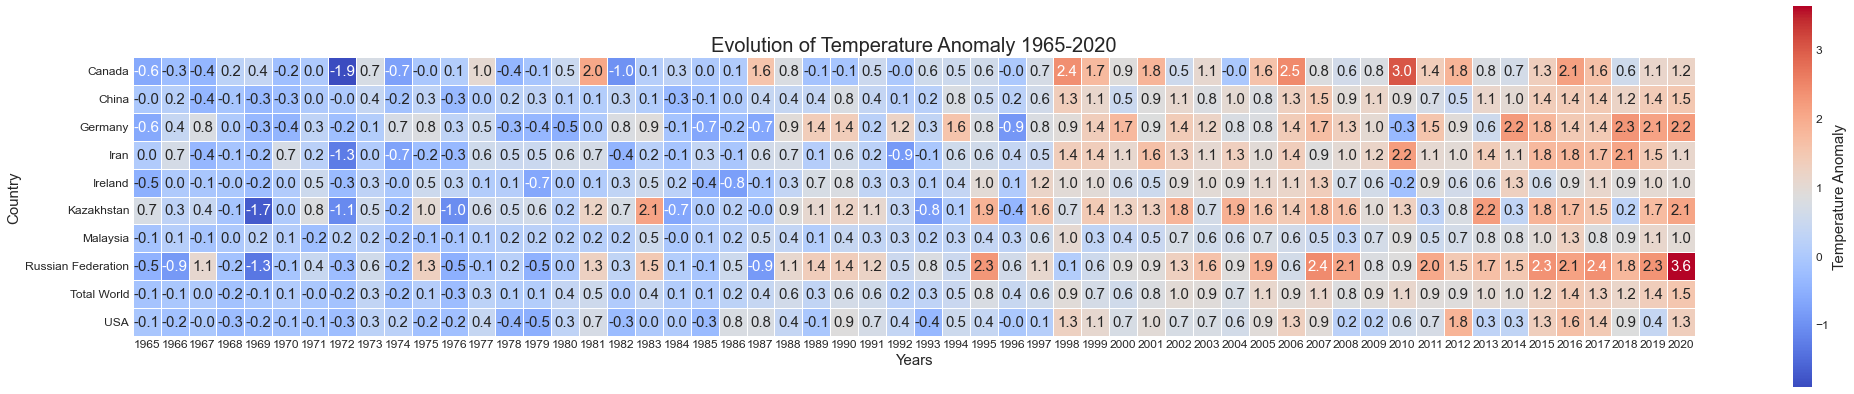

In [13]:
# ticks font size
plt.rc('font', size="15")          # controls default text sizes
plt.rc('axes', titlesize="20")     # fontsize of the axes title
plt.rc('axes', labelsize="15")    # fontsize of the x and y labels
plt.rc('xtick', labelsize="12")    # fontsize of the tick labels
plt.rc('ytick', labelsize="12")    # fontsize of the tick labels
plt.rc('legend', fontsize="15")    # legend fontsize
plt.rc('figure', titlesize="15")  # fontsize of the figure title
#
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(35,7))

# Create country/year vs tempearture anomaly pivot table
pivot_table = country_of_interest.pivot("Country", "Year", "annual_anomaly")

# HeatMap 
sns.heatmap(pivot_table, annot=True, fmt=".1f", linewidths=.5, square=True, cmap='coolwarm',
           cbar_kws={'label': "Temperature Anomaly"})

plt.xlabel('Years')
plt.title("Evolution of Temperature Anomaly 1965-2020")
plt.savefig('Annual_Anomalies_HeatMap_1965-2020.png')
plt.show()

## Attempt Random Forest Analysis

In [14]:
# Clean up missing values and NaN in the dataset
# Important. Sklearn doesn't handle NaN for random forest analysis
country_of_interest.fillna(country_of_interest.mean(), inplace=True)
country_of_interest['Region'].fillna(country_of_interest['Region'].mode().values[0] , inplace = True)
country_of_interest.isna().sum()

/tmp/ipykernel_6252/2261718533.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  country_of_interest.fillna(country_of_interest.mean(), inplace=True)
/home/yangze2065/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Country                     0
Year                        0
pop                         0
Region                      0
co2_mtco2                   0
elect_twh                   0
primary_ej                  0
annual_anomaly              0
annual_temp                 0
Monthly consumption, TWh    0
dtype: int64

In [15]:
# One-hot encode the data using pandas get_dummies
df_onehot = pd.get_dummies(country_of_interest)
# Display the first 5 rows 
df_onehot.head(5)

,Year,pop,co2_mtco2,elect_twh,primary_ej,annual_anomaly,annual_temp,"Monthly consumption, TWh",Country_Canada,Country_China,...,Country_Kazakhstan,Country_Malaysia,Country_Russian Federation,Country_Total World,Country_USA,Region_Asia Pacific,Region_CIS,Region_Europe,Region_Middle East,Region_North America
773,1965,19.628,260.328,2691.914164,4.924,-0.609,-5.499,19.541,1,0,...,0,0,0,0,0,0,0,0,0,1
774,1966,19.976,271.695,2691.914164,5.239,-0.255,-5.145,19.541,1,0,...,0,0,0,0,0,0,0,0,0,1
775,1967,20.325,285.543,2691.914164,5.480,-0.403,-5.293,19.541,1,0,...,0,0,0,0,0,0,0,0,0,1
776,1968,20.675,308.282,2691.914164,5.836,0.241,-4.649,19.541,1,0,...,0,0,0,0,0,0,0,0,0,1
777,1969,21.025,320.456,2691.914164,6.186,0.380,-4.510,19.541,1,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
# Labels are the values we want to predict which is temperature anomaly
labels = np.array(df_onehot['annual_anomaly'])
# Saving feature names for later use
df_onehot_list = list(df_onehot.columns)
# Convert to numpy array
df_onehot = np.array(df_onehot)

In [17]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(df_onehot, labels, test_size = 0.25, random_state = 0)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (420, 23)
Training Labels Shape: (420,)
Testing Features Shape: (140, 23)
Testing Labels Shape: (140,)


In [18]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 20 decision trees
rf = RandomForestRegressor(n_estimators = 20, random_state = 1)
# Train the model on training data
rf.fit(train_features, train_labels);

In [19]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

from sklearn import metrics

print('Mean Absolute Error:', round(metrics.mean_absolute_error(test_labels, predictions), 5), "%.")
print('Mean Squared Error:', round(metrics.mean_squared_error(test_labels, predictions), 5), "%.")
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(test_labels, predictions)), 5), "%.")

Mean Absolute Error: 0.01766 %.
Mean Squared Error: 0.00378 %.
Root Mean Squared Error: 0.06148 %.


In [20]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = df_onehot_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [21]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=20, max_depth = 5)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = df_onehot_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');